# Algoritmos de regressão

Atividade de execução dos seguintes algoritmos de regressão:

* Regressão Linear
* Ridge
* Random Forest
* KNN
* SVM
* AdaBoost

## Dataset Diabetes

O dataset Diabetes é um _toy dataset_ com 442 amostras e as seguintes _features_:

* **age**, idade em anos;
* **sex**, masculino ou feminino;
* **bmi**, IMC;
* **bp**, pressão arterial;
* **s1** tc, T-Cells (tipo de glóbulo branco);
* **s2** ldl, colesterol ldl;
* **s3** hdl, colesterol hdl;
* **s4** tch, hormônio estimulante da tireóide;
* **s5** ltg, antiepiléptico e estabilizador de humor;
* **s6** glu, nível de açúcar no sangue;
* ***Target***, índice de progressão da doença.


In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

diabetes = datasets.load_diabetes(as_frame=True)
diabetes_df = diabetes.data.copy()
diabetes_df['target'] = diabetes.target
diabetes_df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


## Features e correlação

Uma boa prática no processo de criação de um modelo de ML é identificar quais _features_ efetivamente contribuem (ou melhor, possuem correlação) para o valor-alvo / predição. A seleção de _features_ torna o modelo mais simples, rápido, melhora a acurácia e reduz problemas de _overfitting_. 

Para efeito didático, exibimos um mapa de calor mostrando a correlação entre cada uma das features e o campo target. Utilizamos o [método Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) implementado na API do Pandas([DataFrame.corr()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)).

Features como **IMC**, e o antiepiléptico **ltg** possuem correlação forte com o target. 

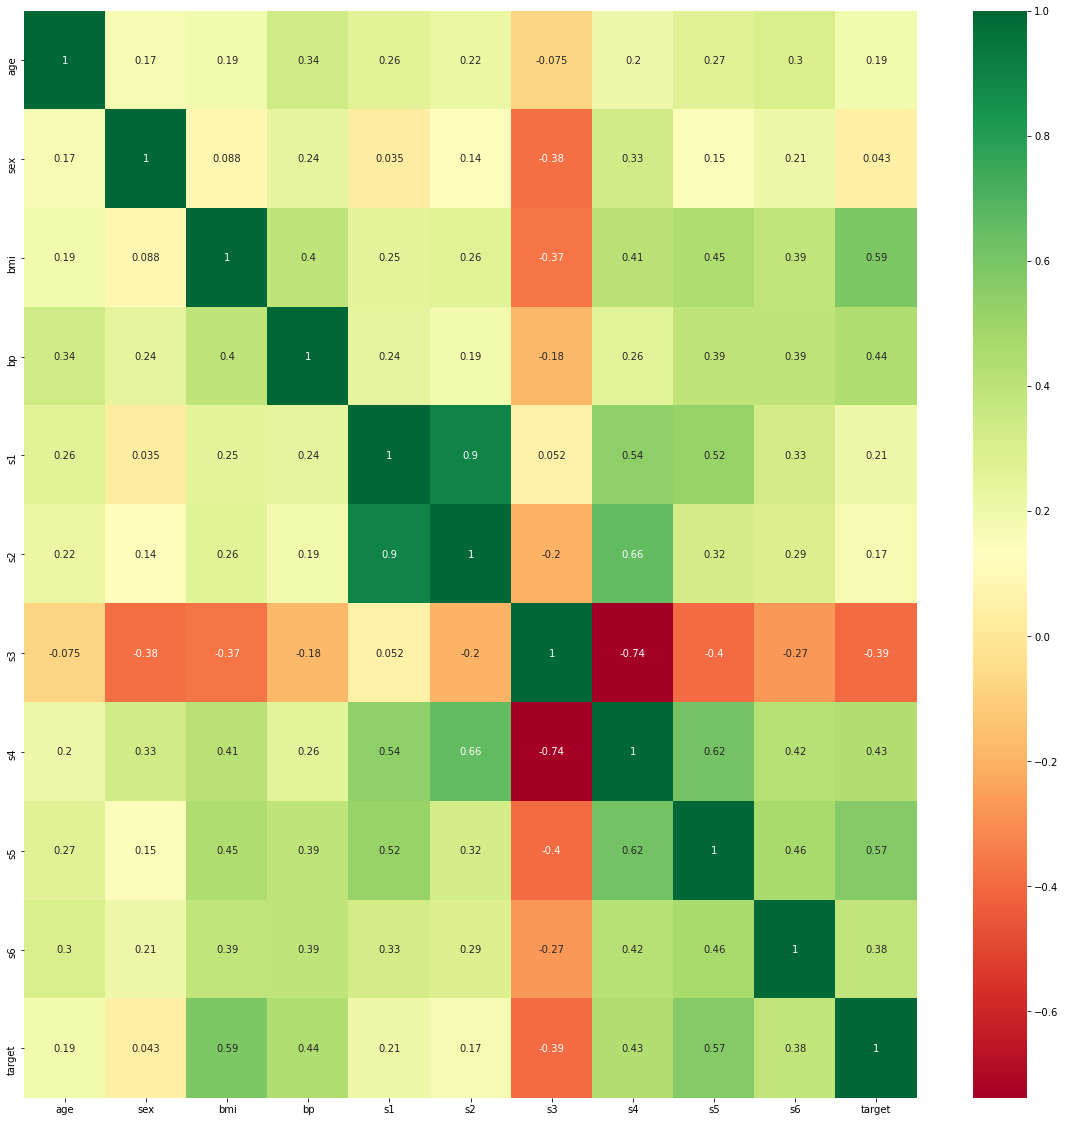

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = diabetes_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(diabetes_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

A API do SciKit-Learn disponibiliza formas automatizadas para seleção das K-melhores features para um modelo específico. Veja a implementação e seleção de features abaixo.

In [3]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=4)
##K Número de principais recursos a serem selecionados. A opção "todos" ignora a 
##seleção, para uso em uma pesquisa de parâmetros.
selector.fit(diabetes.data, diabetes.target)

feats = selector.get_support(True)
feats_name = diabetes.data.columns[feats]

# IMC, Pressão Arterial, hormônio, antiepiléptico
feats_name

Index(['bmi', 'bp', 's4', 's5'], dtype='object')

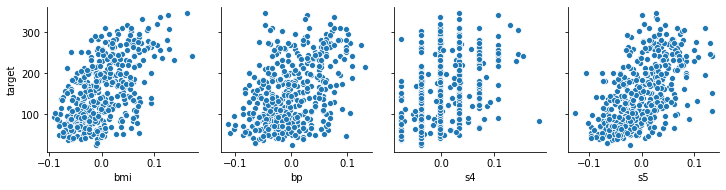

In [4]:
sns.pairplot(diabetes_df, y_vars='target', x_vars=diabetes.data.columns[feats])

In [6]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg_dct = { 
        'Linear': LinearRegression(), 
        'Ridge': Ridge(alpha=0.1), 
        'RandomForest': RandomForestRegressor(n_estimators=10),
        'Lasso': Lasso(alpha=0.2),
        'ElasticNet': ElasticNet(alpha=0.02),
        'GradientBoosting': GradientBoostingRegressor(**params),
        'SVR': SVR(C=1.0, epsilon=0.2),
        'KNN': KNeighborsRegressor(n_neighbors=10)}


data_df = diabetes_df.sample(frac=1)
X = data_df.drop(data_df.columns.difference(feats_name), axis=1)
y = data_df['target']

np.set_printoptions(precision=2)

for name, regression in reg_dct.items():
  scores = cross_val_score(regression, X, y, cv=3)
  print("{} Regression\nScores: {}\n".format(name, scores)) 

NameError: name 'ElasticNet' is not defined